<a href="https://colab.research.google.com/github/nisharampra/simple_NeuralNetwork/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
#nnerual network
import torch.nn as nn
import torch.nn.functional as f

In [ ]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
torch.manual_seed(41)
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df=pd.read_csv(url)

In [ ]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
#cahnge the last colum from string to integer
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#trian test split
x=my_df.drop('variety',axis=1)
y=my_df['variety']

In [ ]:
#conver these to numpy arrays
x=x.values
y=y.values


In [ ]:
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)


In [ ]:
#convert x features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)


In [ ]:
#covert y labels to tesnosrs long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [ ]:
import torch.nn as nn
import torch.optim as optim

# Set the criterion to measure the error
criterion = nn.CrossEntropyLoss()

# Choose the optimizer with the learning rate
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # Add this import
import torch.optim as optim

# Define your model (assuming you've already defined it)
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Use F.relu
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

# Instantiate the model, loss function, and optimizer
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
epochs = 100
losses = []

for i in range(epochs):
    # Forward pass: get predictions
    y_pred = model(x_train)  # Call the model directly

    # Measure the loss
    loss = criterion(y_pred, y_train)

    # Keep track of our losses
    losses.append(loss.item())

    # Print every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i} and Loss: {loss.item()}')

    # Zero gradients, backward pass, and update weights
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()        # Backpropagation to calculate gradients
    optimizer.step()       # Update weights


Epoch: 0 and Loss: 1.1515603065490723
Epoch: 10 and Loss: 1.0348587036132812
Epoch: 20 and Loss: 0.9041417241096497
Epoch: 30 and Loss: 0.6913925409317017
Epoch: 40 and Loss: 0.5036213397979736
Epoch: 50 and Loss: 0.3465844988822937
Epoch: 60 and Loss: 0.2038625180721283
Epoch: 70 and Loss: 0.1130586490035057
Epoch: 80 and Loss: 0.07162600010633469
Epoch: 90 and Loss: 0.053117264062166214


Text(0.5, 0, 'Epoch')

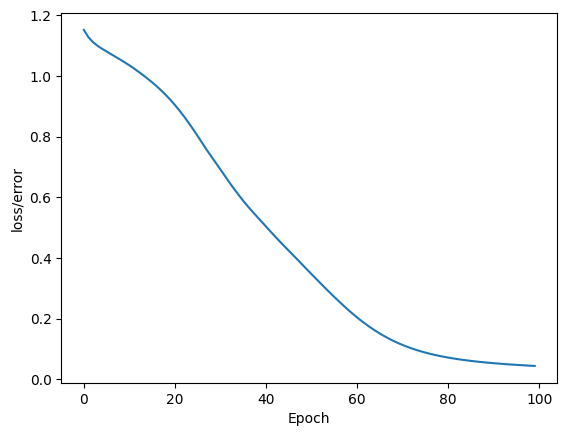

In [ ]:
#graph
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [ ]:
#evalvuate model on test data set
with torch.no_grad():#basically turn off black propogation
     y_eval=model.forward(x_test)
     loss=criterion(y_eval,y_test)

In [ ]:
loss

tensor(0.1364)

In [ ]:
correct = 0
with torch.no_grad():  # No gradient tracking
    for i in range(len(x_test)):
        data = x_test[i].unsqueeze(0)  # Add batch dimension
        y_val = model(data)  # Forward pass

        # Determine the flower class
        if y_test[i].item() == 0:
            x = "Setosa"
        elif y_test[i].item() == 1:
            x = 'Versicolor'
        else:
            x = 'Virginica'

        # Print predicted and actual classes
        print(f'{i+1}.)  {str(y_val)} \t Actual: {y_test[i].item()} \t Predicted: {y_val.argmax().item()}')

        # Check if prediction is correct
        if y_val.argmax().item() == y_test[i].item():
            correct += 1

print(f'We got {correct} correct!')


1.)  tensor([[-6.4702,  3.6499,  5.0743]]) 	 Actual: 2 	 Predicted: 2
2.)  tensor([[-10.1099,   2.9329,   9.6888]]) 	 Actual: 2 	 Predicted: 2
3.)  tensor([[-10.5001,   4.0321,   9.4971]]) 	 Actual: 2 	 Predicted: 2
4.)  tensor([[-3.3104,  4.6125,  0.8697]]) 	 Actual: 1 	 Predicted: 1
5.)  tensor([[-8.7976,  3.6673,  7.7473]]) 	 Actual: 2 	 Predicted: 2
6.)  tensor([[-0.8969,  5.0719, -2.1214]]) 	 Actual: 1 	 Predicted: 1
7.)  tensor([[-6.3293,  3.9116,  4.7591]]) 	 Actual: 2 	 Predicted: 2
8.)  tensor([[-3.5148,  4.4197,  1.2178]]) 	 Actual: 1 	 Predicted: 1
9.)  tensor([[-7.6917,  3.6967,  6.4551]]) 	 Actual: 2 	 Predicted: 2
10.)  tensor([[-11.0091,   3.0336,  10.6667]]) 	 Actual: 2 	 Predicted: 2
11.)  tensor([[-6.2981,  3.7285,  4.8299]]) 	 Actual: 2 	 Predicted: 2
12.)  tensor([[  9.4540,   3.7474, -14.2829]]) 	 Actual: 0 	 Predicted: 0
13.)  tensor([[  8.6365,   3.2494, -12.9447]]) 	 Actual: 0 	 Predicted: 0
14.)  tensor([[ 0.5946,  4.3015, -3.3399]]) 	 Actual: 1 	 Predicted: 1


In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])


In [ ]:
with torch.no_grad():
  print(model(new_iris))

tensor([  8.9832,   3.4495, -13.5147])


In [ ]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])


In [ ]:

with torch.no_grad():
  print(model(newer_iris))

tensor([-7.4095,  3.2397,  6.3966])


In [ ]:

# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [ ]:

# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [ ]:
# Make sure it loaded correctly
new_model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)